# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Supress Warning

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import Files

In [3]:
app_data = pd.read_csv('C:/Users/Hitesh/Desktop/Assignments/EDA Case Study/application_data.csv')

In [4]:
prev_app = pd.read_csv('C:/Users/Hitesh/Desktop/Assignments/EDA Case Study/previous_application.csv')

# Investigate app_data

In [5]:
app_data.shape

(307511, 122)

In [6]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Check NULL Percentage

In [7]:
#Check for NULL percentage greater than 15%
i = 0
percent_NA = 0
for i in app_data.columns:
    percent_NA = round(100*(app_data[i].isnull().sum()/len(app_data.index)),2)
    if percent_NA>15:
        print(i,' ',percent_NA)

OWN_CAR_AGE   65.99
OCCUPATION_TYPE   31.35
EXT_SOURCE_1   56.38
EXT_SOURCE_3   19.83
APARTMENTS_AVG   50.75
BASEMENTAREA_AVG   58.52
YEARS_BEGINEXPLUATATION_AVG   48.78
YEARS_BUILD_AVG   66.5
COMMONAREA_AVG   69.87
ELEVATORS_AVG   53.3
ENTRANCES_AVG   50.35
FLOORSMAX_AVG   49.76
FLOORSMIN_AVG   67.85
LANDAREA_AVG   59.38
LIVINGAPARTMENTS_AVG   68.35
LIVINGAREA_AVG   50.19
NONLIVINGAPARTMENTS_AVG   69.43
NONLIVINGAREA_AVG   55.18
APARTMENTS_MODE   50.75
BASEMENTAREA_MODE   58.52
YEARS_BEGINEXPLUATATION_MODE   48.78
YEARS_BUILD_MODE   66.5
COMMONAREA_MODE   69.87
ELEVATORS_MODE   53.3
ENTRANCES_MODE   50.35
FLOORSMAX_MODE   49.76
FLOORSMIN_MODE   67.85
LANDAREA_MODE   59.38
LIVINGAPARTMENTS_MODE   68.35
LIVINGAREA_MODE   50.19
NONLIVINGAPARTMENTS_MODE   69.43
NONLIVINGAREA_MODE   55.18
APARTMENTS_MEDI   50.75
BASEMENTAREA_MEDI   58.52
YEARS_BEGINEXPLUATATION_MEDI   48.78
YEARS_BUILD_MEDI   66.5
COMMONAREA_MEDI   69.87
ELEVATORS_MEDI   53.3
ENTRANCES_MEDI   50.35
FLOORSMAX_MEDI   49.76
F

### Remove Attributes with High NULL Percentage

In [8]:
# Drop all the columns with high NULL percentage (here the cutoff is taken 15%)
# Exclusion is applied on 66% NULL - will explain it later

null_count = round(app_data.isnull().sum() / len(app_data),2)
missing_values = null_count[(null_count > 0.15) & (null_count != .66)].index
app_data.drop(missing_values, axis=1, inplace=True)

In [9]:
#Check - Columns retained
app_data.shape

(307511, 75)

In [10]:
#Check NULL Data Again
#Kept OWN_CAR_AGE for further analysis

i = 0
percent_NA = 0
for i in app_data.columns:
    percent_NA = round(100*(app_data[i].isnull().sum()/len(app_data.index)),2)
    if percent_NA>0:
        print(i,' ',percent_NA)

AMT_GOODS_PRICE   0.09
NAME_TYPE_SUITE   0.42
OWN_CAR_AGE   65.99
EXT_SOURCE_2   0.21
YEARS_BUILD_AVG   66.5
YEARS_BUILD_MODE   66.5
YEARS_BUILD_MEDI   66.5
OBS_30_CNT_SOCIAL_CIRCLE   0.33
DEF_30_CNT_SOCIAL_CIRCLE   0.33
OBS_60_CNT_SOCIAL_CIRCLE   0.33
DEF_60_CNT_SOCIAL_CIRCLE   0.33
AMT_REQ_CREDIT_BUREAU_HOUR   13.5
AMT_REQ_CREDIT_BUREAU_DAY   13.5
AMT_REQ_CREDIT_BUREAU_WEEK   13.5
AMT_REQ_CREDIT_BUREAU_MON   13.5
AMT_REQ_CREDIT_BUREAU_QRT   13.5
AMT_REQ_CREDIT_BUREAU_YEAR   13.5


### Data Imputation

#### OWN_CAR_AGE - Missing Not At Random - MNAR

In [11]:
#Check for FLAG_OWN_CAR as 'N' 
app_data.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [12]:
#Check for OWN_CAR_AGE as NULL 
app_data.OWN_CAR_AGE.isnull().sum()

202929

In [13]:
# Now if you analyse you will find out that OWN_CAR_AGE is associated with FLAG_OWN_CAR but there is still a gap of 5 records
# Lets analyse those

car_corelation = app_data[(app_data['FLAG_OWN_CAR']=='Y') & (app_data['OWN_CAR_AGE'].isnull())]
car_corelation[['OWN_CAR_AGE','FLAG_OWN_CAR']]

,OWN_CAR_AGE,FLAG_OWN_CAR
30897,NaN,Y
181231,NaN,Y
217549,NaN,Y
229867,NaN,Y
236868,NaN,Y


In [14]:
#Lets impute with 0 for all NULL and NaN Values
app_data.loc[pd.isnull(app_data['OWN_CAR_AGE']),['OWN_CAR_AGE']]=0
app_data['OWN_CAR_AGE'].fillna('0', inplace=True)

#### Imputing Columns Related to various CREDIT_BUREAU frequencies - Missing At Random (MAR)

In [15]:
#From below you will observe that all the CREDIT_BUREAU frequencies are NULL altogether.
#The reason behind the missing value may be associated with some other feature which we would check later

CREDIT_BUREAU_corelation = app_data[(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull()) & (app_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull())
                         & (app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull()) & (app_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull())
                         & (app_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull()) & (app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull())]

In [16]:
# The counts of NULL are exactly matching with app_data dataset
len(CREDIT_BUREAU_corelation)/len(app_data)*100

13.501630835970097

In [17]:
#Number of Rows are exactly matching so we can derive all 6 attributes are left NULL and are corelated.
CREDIT_BUREAU_corelation.shape

(41519, 75)

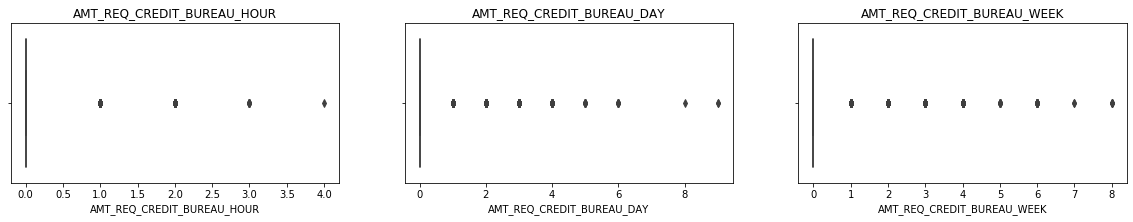

<Figure size 432x288 with 0 Axes>

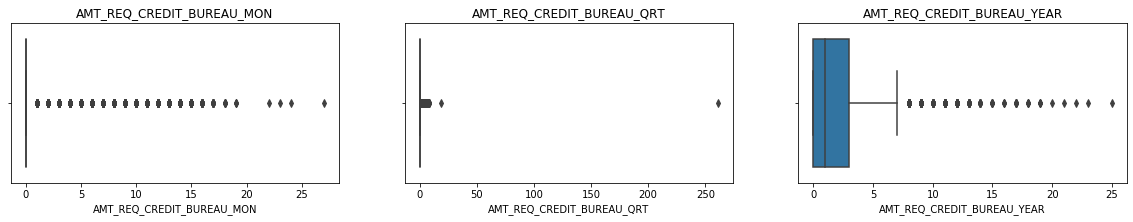

In [18]:
# Example: Create a figure having of these 6 variables to see none of these are Normally Distributed

# I DO NOT want to impute NULLS here as the percentage is above 13 and none of these attributes are Normally Distributed.
# Have to do outlier treatment to impute values.For this Case study, I would rather delete these columns 
# because these does not look very informative according to our scope of this Case Study. We would learn dealing with NULL
# data using various imputation going forward.
# Below example is just to showcase the "sensible decision" to drop these columns.

plt.figure(figsize=(20,10))

# Optional command, since matplotlib creates a figure by default anyway
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("AMT_REQ_CREDIT_BUREAU_HOUR")
sns.boxplot(app_data.AMT_REQ_CREDIT_BUREAU_HOUR)


# subplot 2 
plt.subplot(3, 3, 2)
plt.title("AMT_REQ_CREDIT_BUREAU_DAY")
sns.boxplot(app_data.AMT_REQ_CREDIT_BUREAU_DAY)


# subplot 3
plt.subplot(3, 3, 3)
plt.title("AMT_REQ_CREDIT_BUREAU_WEEK")
sns.boxplot(app_data.AMT_REQ_CREDIT_BUREAU_WEEK)

plt.figure(2)
plt.figure(figsize=(20,10))
# subplot 1
plt.subplot(3, 3, 1)
plt.title("AMT_REQ_CREDIT_BUREAU_MON")
sns.boxplot(app_data.AMT_REQ_CREDIT_BUREAU_MON)


# subplot 2 
plt.subplot(3, 3, 2)
plt.title("AMT_REQ_CREDIT_BUREAU_QRT")
sns.boxplot(app_data.AMT_REQ_CREDIT_BUREAU_QRT)


# subplot 3
plt.subplot(3, 3, 3)
plt.title("AMT_REQ_CREDIT_BUREAU_YEAR")
sns.boxplot(app_data.AMT_REQ_CREDIT_BUREAU_YEAR)

plt.show()

In [19]:
# Drop these 6 attributes as explained in above step

app_data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)

#### Imputing Other Columns  - Missing Completely At Random (MCAR)

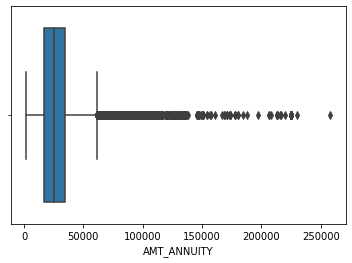

In [20]:
#Check for the distribution of AMT_ANNUITY
sns.boxplot(app_data.AMT_ANNUITY)

In [21]:
#Check for the NULL Count in AMT_ANNUITY 
app_data['AMT_ANNUITY'].isnull().sum()

12

In [22]:
#Replace NULL with median as data is not normally distributed
app_data.loc[pd.isnull(app_data['AMT_ANNUITY']),['AMT_ANNUITY']]=app_data['AMT_ANNUITY'].median()

In [23]:
#Verify Results
app_data.AMT_ANNUITY.isnull().sum()

0

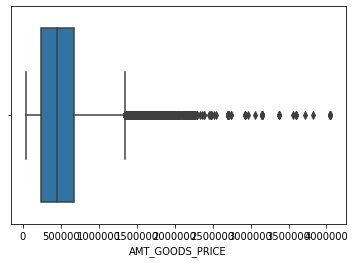

In [24]:
# Chcke the disctribution of AMT_GOODS_PRICE - Its also having Outliers but there are continuous outliers
sns.boxplot(app_data.AMT_GOODS_PRICE)

In [25]:
#Lets replace NULLs with Median as the data is not normally distributed and NULL percentage is below 1%
app_data.loc[pd.isnull(app_data['AMT_GOODS_PRICE']),['AMT_GOODS_PRICE']]=app_data['AMT_GOODS_PRICE'].median()

In [26]:
#Verify the results
app_data.AMT_GOODS_PRICE.isnull().sum()

0

#### Imputing Categorical Data

In [27]:
#Now, lets see how we can impute NAME_TYPE_SUITE
app_data.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [28]:
#Check for the mode of NAME_TYPE_SUITE
app_data['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
dtype: object

In [29]:
#Replace NULL with Mode
app_data.NAME_TYPE_SUITE.fillna(app_data.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [30]:
#Verify the results
app_data.NAME_TYPE_SUITE.isnull().sum()

0

#### Replacing NULL with Mean

In [31]:
# Here we see Mean and Median are not really far. Also the difference between 25th and 75th percentile not very huge
app_data.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

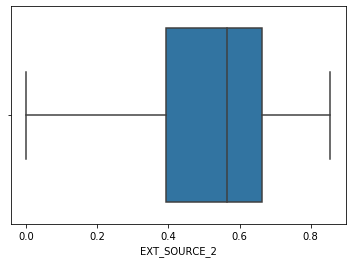

In [32]:
# Distribution is close to Normal but its not perfectly normally distributed
sns.boxplot(app_data.EXT_SOURCE_2)

In [33]:
#Replace NULL with Mean as Null percentage is low and Mean/Median are not very far away
app_data.loc[pd.isnull(app_data['EXT_SOURCE_2']),['EXT_SOURCE_2']]=app_data['EXT_SOURCE_2'].mean()

#### Let's get rid of non-critical attributes

In [34]:
# Check again what we are left with and remove non-critical attributes
app_data.shape

(307511, 69)

In [35]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
     

In [36]:
# Remove non-critical attributes based on Functional knowledge of this Case Study (may defer situation to situation)

app_data.drop(['YEARS_BUILD_AVG','YEARS_BUILD_MODE','YEARS_BUILD_MEDI','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE',
'CNT_FAM_MEMBERS','OWN_CAR_AGE','DAYS_LAST_PHONE_CHANGE','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE'],axis=1,inplace=True)

In [37]:
# Check again what we are left with.
app_data.shape

(307511, 26)

#### Datatype change

In [38]:
#Doesnot look necessary  for any of the attribute to change Datatype. Will assess it later while doing further analysis.
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307511 non-null float64
AMT_GOODS_PRICE                307511 non-null float64
NAME_TYPE_SUITE                307511 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED            

##### Standardize Values in Various Columns - Change Days to Years

In [39]:
# Also, abs value taken so that the Year does not remain in negative value
app_data['YEARS_EMPLOYED'] = app_data.apply(lambda x: abs(round(x['DAYS_EMPLOYED']/ 365,2)), axis=1)

In [40]:
app_data['YEARS_BIRTH'] = app_data.apply(lambda x: abs(round(x['DAYS_BIRTH']/ 365,2)), axis=1)

In [41]:
app_data['YEARS_REGISTRATION'] = app_data.apply(lambda x: abs(round(x['DAYS_REGISTRATION']/ 365,2)), axis=1)

In [42]:
app_data['YEARS_ID_PUBLISH'] = app_data.apply(lambda x: abs(round(x['DAYS_ID_PUBLISH']/ 365,2)), axis=1)

In [43]:
#Drop the Parent columns as we already have values in new columns
app_data.drop(['DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH'],axis=1,inplace=True)

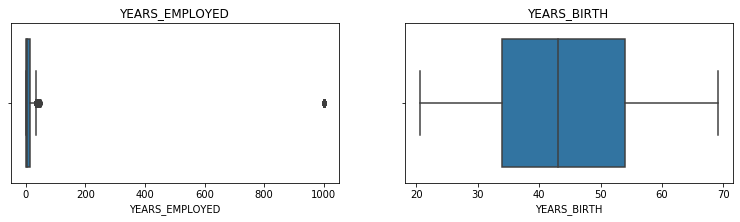

<Figure size 432x288 with 0 Axes>

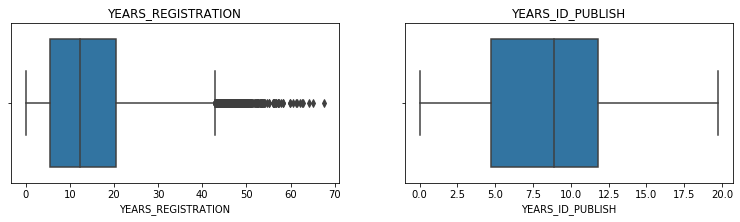

In [44]:
# Check if we have Outliers present in above 4 attributes

plt.figure(figsize=(20,10))

# Optional command, since matplotlib creates a figure by default anyway
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("YEARS_EMPLOYED")
sns.boxplot(app_data.YEARS_EMPLOYED)


# subplot 2 
plt.subplot(3, 3, 2)
plt.title("YEARS_BIRTH")
sns.boxplot(app_data.YEARS_BIRTH)


plt.figure(2)
plt.figure(figsize=(20,10))
# subplot 1
plt.subplot(3, 3, 1)
plt.title("YEARS_REGISTRATION")
sns.boxplot(app_data.YEARS_REGISTRATION)


# subplot 2 
plt.subplot(3, 3, 2)
plt.title("YEARS_ID_PUBLISH")
sns.boxplot(app_data.YEARS_ID_PUBLISH)

plt.show()

In [45]:
# In ideal scenario, Age should always be greater than other 3 attributes but it is not so.

time_colms_subset = app_data[(app_data['YEARS_BIRTH'] < app_data['YEARS_REGISTRATION']) | (app_data['YEARS_BIRTH'] < app_data['YEARS_ID_PUBLISH'])
                | (app_data['YEARS_BIRTH'] < app_data['YEARS_EMPLOYED'])]

In [46]:
time_colms_subset.shape

(55374, 26)

In [47]:
#Check the unique values of YEARS_EMPLOYED
time_colms_subset.YEARS_EMPLOYED.value_counts()

1000.67    55374
Name: YEARS_EMPLOYED, dtype: int64

In [48]:
# Here we find for Pensioner and Unemployed people employment duration is defaulted to 1000.67

time_colms_subset.NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [49]:
# Make a copy of all other records which are having valid values in YEARS_EMPLOYED
YEARS_EMPLOYED_Subset = app_data[~(app_data[['YEARS_EMPLOYED']]>800)].copy()

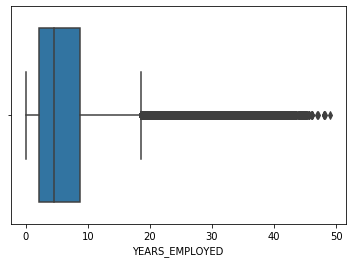

In [50]:
# Check for distribution of YEARS_EMPLOYED_Subset. Looks like its better than the complete dataset.
sns.boxplot(YEARS_EMPLOYED_Subset.YEARS_EMPLOYED)

In [51]:
#Replace High Range YEARS_EMPLOYED values to Median of the subset created above for sane distribution.
app_data['YEARS_EMPLOYED'][app_data.YEARS_EMPLOYED>1000] = YEARS_EMPLOYED_Subset.YEARS_EMPLOYED.median()

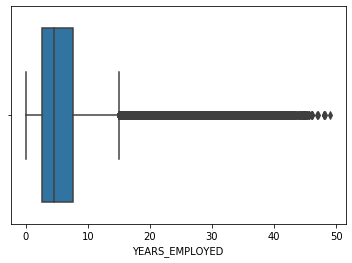

In [52]:
#Now, check the distribution of YEARS_EMPLOYED.
sns.boxplot(app_data.YEARS_EMPLOYED)

#### Capping Data

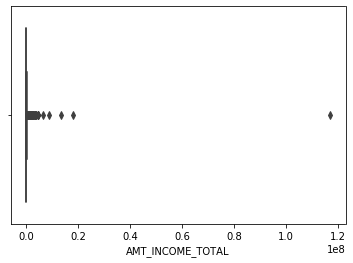

In [53]:
#Check for the Outlies in AMT_INCOME_TOTAL
sns.boxplot(app_data.AMT_INCOME_TOTAL)

In [54]:
# Check highest income
app_data.AMT_INCOME_TOTAL.sort_values(ascending=False).head(20)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
204564      4500000.0
103006      4500000.0
187833      4500000.0
287463      4500000.0
181698      3950059.5
20216       3825000.0
49645       3600000.0
284311      3600000.0
82846       3375000.0
86026       3375000.0
248159      3150000.0
101007      3150000.0
107926      2930026.5
258773      2700000.0
298082      2475000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [55]:
#Cap all the income which is greater than 4000000 to 5000000

app_data['AMT_INCOME_TOTAL'][app_data.AMT_INCOME_TOTAL>4000000.0] = 5000000.0

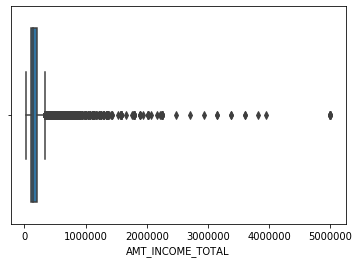

In [56]:
#Check for the distribution again
sns.boxplot(app_data.AMT_INCOME_TOTAL)

#### Binning Attributes

In [57]:
# Check for the mimimum and maximum values available in YEARS_BIRTH
print(app_data.YEARS_BIRTH.min(),app_data.YEARS_BIRTH.max())

20.52 69.12


In [58]:
# Bin the data according to the Decade
app_data['age_by_decade'] = pd.cut(x=app_data['YEARS_BIRTH'], bins=[20, 29, 39, 49, 59, 70], labels=['20s', '30s', '40s','50s','60s'])

In [59]:
#Verify the data
app_data.age_by_decade.value_counts()

30s    81212
40s    78660
50s    68065
60s    42196
20s    37378
Name: age_by_decade, dtype: int64

In [60]:
# Check for the mimimum and maximum values available in YEARS_EMPLOYED
print(app_data.YEARS_EMPLOYED.min(),app_data.YEARS_EMPLOYED.max())

0.0 49.07


In [62]:
# Bin the data according to the Decade
app_data['Emp_by_decade'] = pd.cut(x=app_data['YEARS_EMPLOYED'], bins=[-1, 0 , 9, 19 , 29, 39, 50], 
                                   labels=['No Employemnt', 'Less Than 10', '10-20','21-30','31-40','41-50'])

In [63]:
#Verify the data
app_data.Emp_by_decade.value_counts()

Less Than 10     247597
10-20             45490
21-30             10848
31-40              3215
41-50               358
No Employemnt         3
Name: Emp_by_decade, dtype: int64

In [64]:
# Remove parent columns
app_data.drop(['YEARS_BIRTH','YEARS_EMPLOYED'],axis=1,inplace=True)

#### Data Cleaning - Single and multi-variate analysis

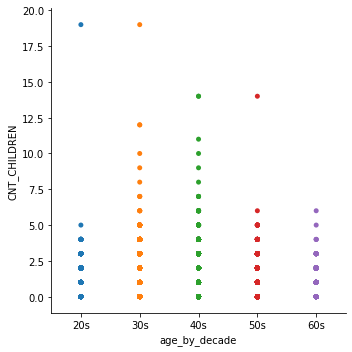

In [65]:
# Below we have some cases where age is below 30 and number of Children are above 17 which is not possible.

sns.catplot(x="age_by_decade", y="CNT_CHILDREN", jitter=False, data=app_data)

In [66]:
# Create another dataset where we take all the rows for which CNT_CHILDREN>17
Children_Subset = app_data[~(app_data[['CNT_CHILDREN']]>17)].copy()

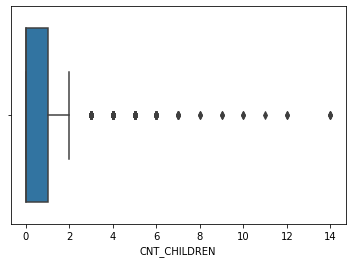

In [67]:
#Draw the Disrribution of CNT_CHILDREN
sns.boxplot(Children_Subset.CNT_CHILDREN)

In [68]:
#Replace High Range CNT_CHILDREN values to Median of the subset created above for sane distribution.
app_data['CNT_CHILDREN'][app_data.CNT_CHILDREN>17] = Children_Subset.CNT_CHILDREN.median()

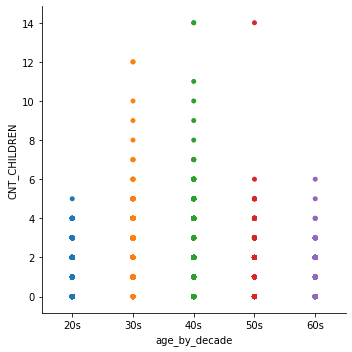

In [68]:
# Check again for YEARS_BIRTH and CNT_CHILDREN relation. Looks bit better now.
sns.catplot(x="age_by_decade", y="CNT_CHILDREN", jitter=False, data=app_data)

####  Divide the data into two sets, i.e. Target=1 and Target=0.

In [69]:
fraud_cases=app_data[app_data['TARGET']==1]
non_fraud=app_data[app_data['TARGET']==0]

In [70]:
# Check for the Categorical and Numerical data in app_data
app_data.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
FLAG_EMAIL                          2
FLAG_PHONE                          2
FLAG_MOBIL                          2
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
age_by_decade                       5
NAME_EDUCATION_TYPE                 5
Emp_by_decade                       6
NAME_FAMILY_STATUS                  6
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
CNT_CHILDREN                       14
ORGANIZATION_TYPE                  58
AMT_GOODS_PRICE                  1002
YEARS_ID_PUBLISH                 1716
AMT_INCOME_TOTAL                 2543
YEARS_REGISTRATION               4721
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
EXT_SOURCE_2                   119832
SK_ID_CURR                     307511
dtype: int64

#### Let's start analysing Categorical Data

###### Please note that in some cases mean is taken for Piechart whereas in some cases sum is taken.
###### Logic - 
###### Sum - When I want aggregated data. Example - Banks are more intertesd in total amount defaulted by particular category. 
###### Summation is good for balanced dataset but we would use it here understanding pros and cons of it.

###### Mean - It provide better picture because it gave average value of grouped attribute. But in some cases, 
###### our study may not satisfy the objestive as we need cumulative data.

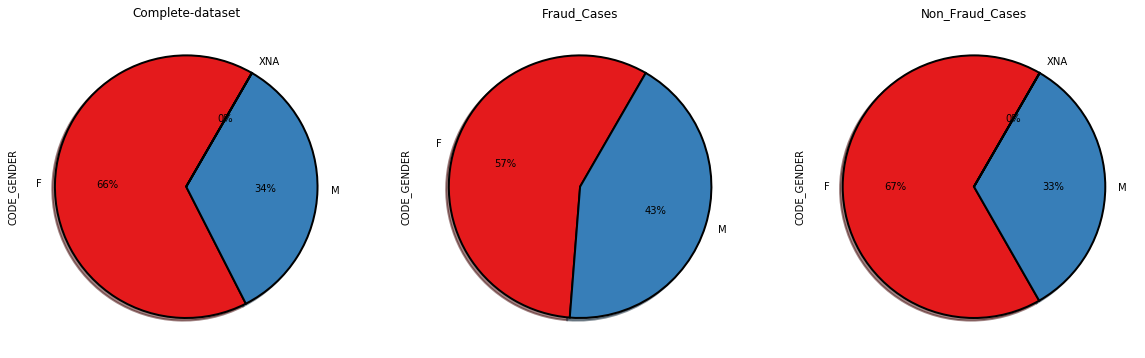

In [83]:
# Let's now see how CODE_GENDER plays role in Loans Defaulting
# You will find Men are more prone for Bad Loans with the given percentage comparison.

plt.figure(figsize=(20,15))

plt.subplot(1, 3, 1)
plt.title("Complete-dataset")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.CODE_GENDER.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set1"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)


plt.subplot(1, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.CODE_GENDER.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set1"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)

plt.subplot(1, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud.CODE_GENDER.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set1"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)


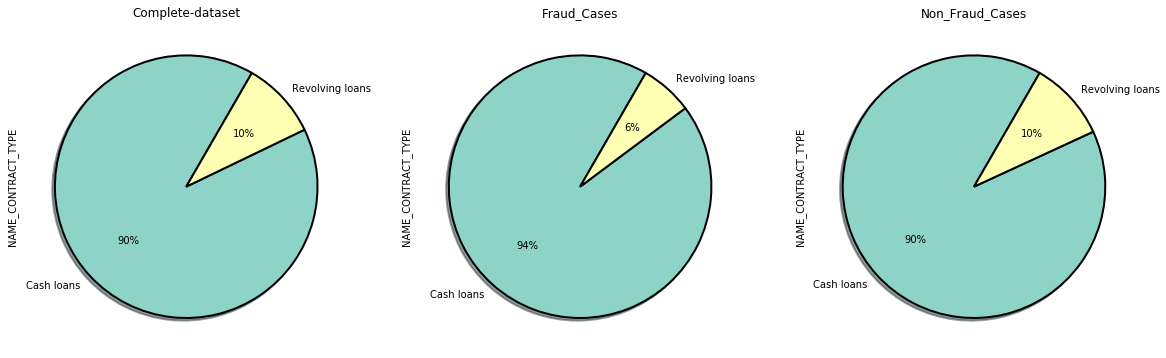

In [84]:
# And now, how NAME_CONTRACT_TYPE plays role in Loans Defaulting
# You will find there are high chances of Cash Loans getting default.

plt.figure(figsize=(20,15))

plt.subplot(1, 3, 1)
plt.title("Complete-dataset")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)


plt.subplot(1, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)

plt.subplot(1, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)


#### Bivariate analysis on Categorical and Numerical data

In [73]:
# Let's do Bivariate analysis on Categorical Data
# Below we have replaced CAR_OWN Indicator to Numeric indicator to make it simpler to analyse

non_fraud['CAR_OWN'] = np.where(non_fraud.FLAG_OWN_CAR == 'Y', 1,0)
fraud_cases['CAR_OWN'] = np.where(fraud_cases.FLAG_OWN_CAR == 'Y', 1,0)
app_data['CAR_OWN'] = np.where(app_data.FLAG_OWN_CAR == 'Y', 1,0)

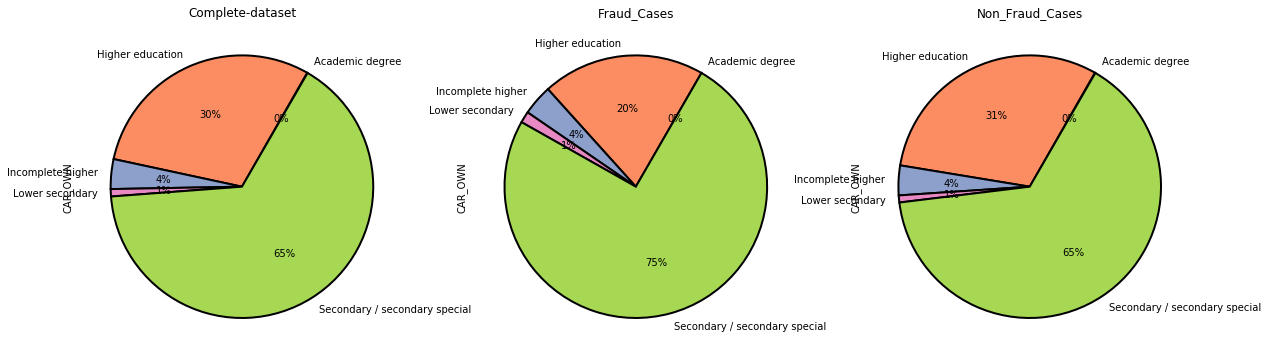

In [85]:
# Analysis how Owner of the cars and their education play role in Fraud Loans
# You will see, Higher Education people do lesser frauds.

plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)
plt.title("Complete-dataset")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.groupby("NAME_EDUCATION_TYPE")['CAR_OWN'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set2"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(1, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.groupby("NAME_EDUCATION_TYPE")['CAR_OWN'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set2"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(1, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud.groupby("NAME_EDUCATION_TYPE")['CAR_OWN'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set2"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})



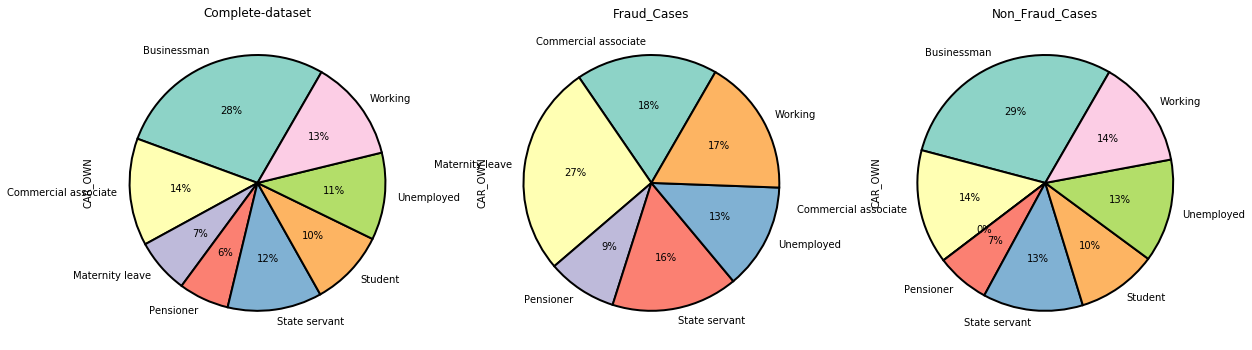

In [89]:
# Analysis how Owner of the cars and their Income plays role in Fraud Loans
# You will find people with Car and on Maternity Leave plays a great factor here.

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-dataset")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.groupby("NAME_INCOME_TYPE")['CAR_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.groupby("NAME_INCOME_TYPE")['CAR_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud.groupby("NAME_INCOME_TYPE")['CAR_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

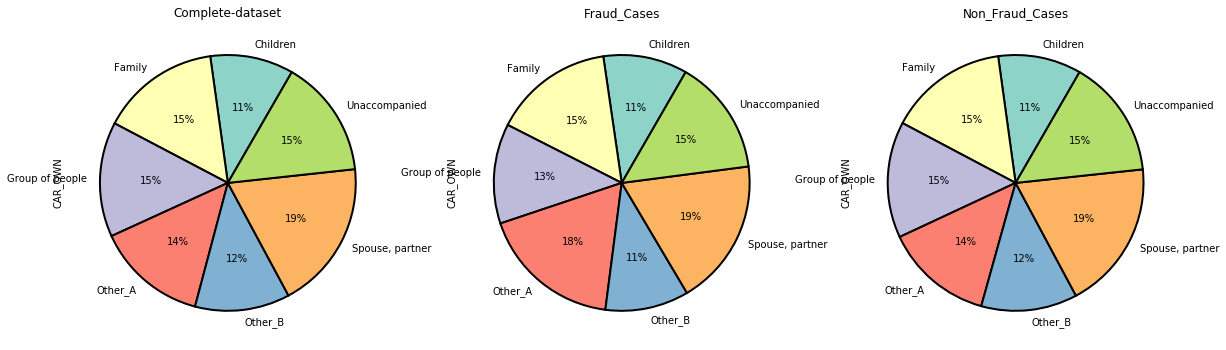

In [91]:
# Analysis how Owner of the cars walks in to Bank with someone and allows us to create any pattern on Fraud Loan?
# Don't think so we got anything here. All the 3 analysis looks almost same
# We can say that people who owns can can walk with anyone or alone, it wont determine whether they age going to be fraud.

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-dataset")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.groupby("NAME_TYPE_SUITE")['CAR_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.groupby("NAME_TYPE_SUITE")['CAR_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud.groupby("NAME_TYPE_SUITE")['CAR_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

In [93]:
# Let's do the same analysis on FLAG_OWN_REALTY which would tell how having some property impacts on Loan Default

non_fraud['REALTY_OWN'] = np.where(non_fraud.FLAG_OWN_REALTY == 'Y', 1,0)
fraud_cases['REALTY_OWN'] = np.where(fraud_cases.FLAG_OWN_REALTY == 'Y', 1,0)
app_data['REALTY_OWN'] = np.where(app_data.FLAG_OWN_REALTY == 'Y', 1,0)

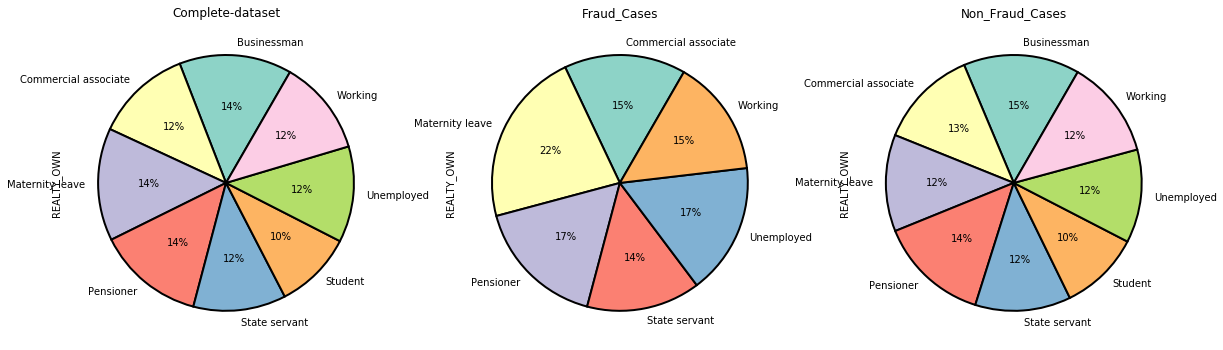

In [99]:
# Analysis how Owner of the reality and their Income type plays role in Fraud Loans
# You will find Working client on Maternity leaves having higher percentage.

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-dataset")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.groupby("NAME_INCOME_TYPE")['REALTY_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.groupby("NAME_INCOME_TYPE")['REALTY_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud.groupby("NAME_INCOME_TYPE")['REALTY_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

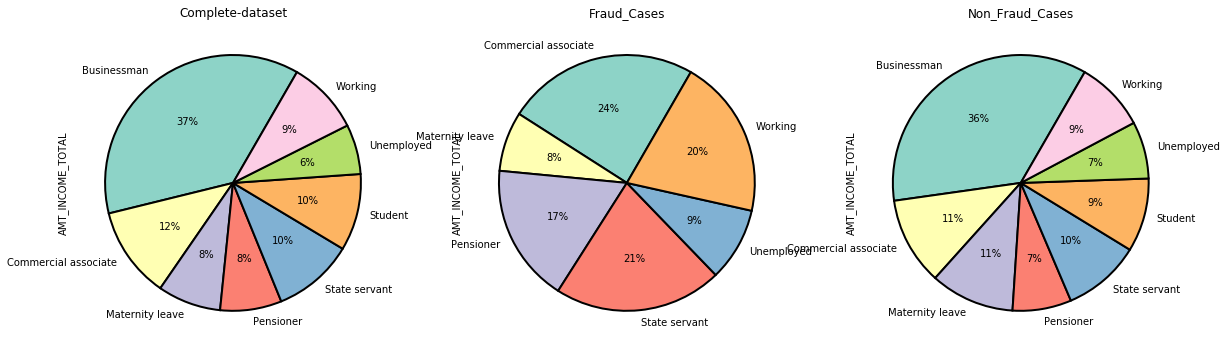

In [105]:
# Here we taken AMT_INCOME_TOTAL and NAME_INCOME_TYPE
# Clearly, the average of income with certain jon title plays a big role here.
# Example - You wont find Businessment as defaulters

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-dataset")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.groupby("NAME_INCOME_TYPE")['AMT_INCOME_TOTAL'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.groupby("NAME_INCOME_TYPE")['AMT_INCOME_TOTAL'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud.groupby("NAME_INCOME_TYPE")['AMT_INCOME_TOTAL'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

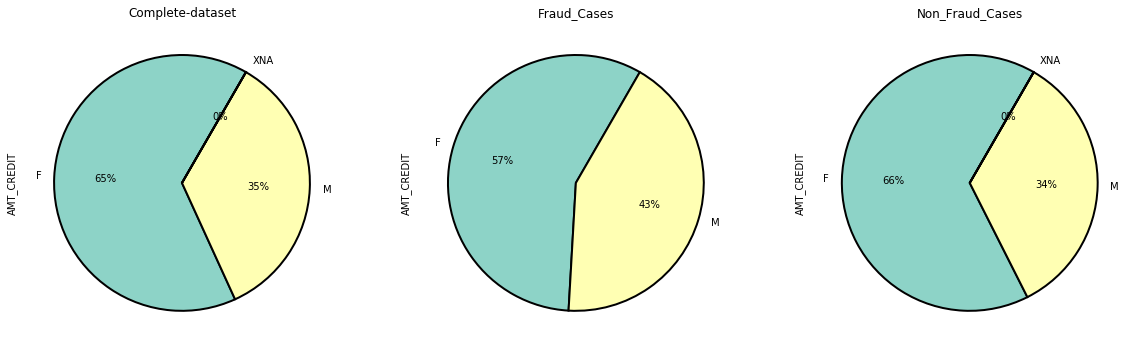

In [106]:
# Here we taken AMT_CREDIT and CODE_GENDER
# Although more money is given to females, males customers score higher in default cases on the value aggregation.

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-dataset")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.groupby("CODE_GENDER")['AMT_CREDIT'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.groupby("CODE_GENDER")['AMT_CREDIT'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud.groupby("CODE_GENDER")['AMT_CREDIT'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

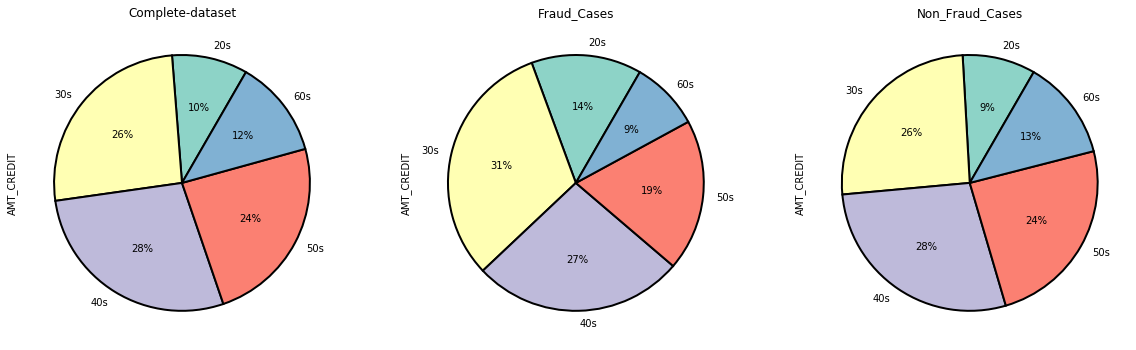

In [107]:
# Here we taken age_by_decade and AMT_CREDIT
# People in their 30s takes around quarter of defaulted money.

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-dataset")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.groupby("age_by_decade")['AMT_CREDIT'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.groupby("age_by_decade")['AMT_CREDIT'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud.groupby("age_by_decade")['AMT_CREDIT'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

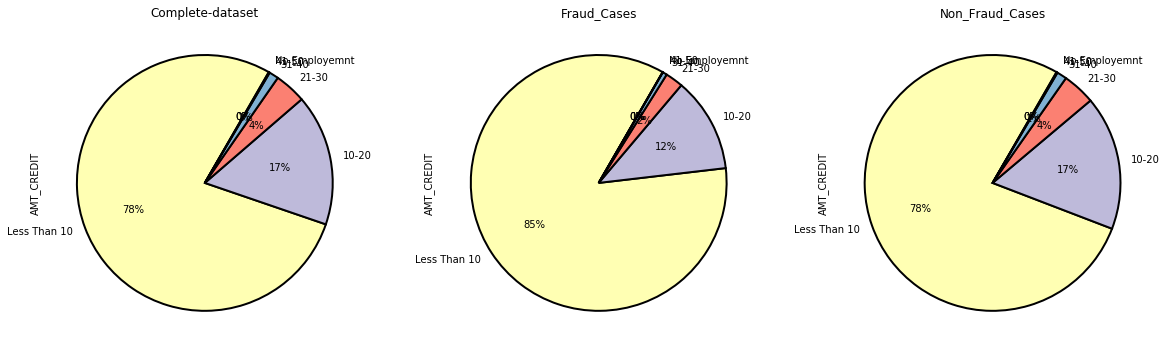

In [108]:
# Here we taken Emp_by_decade and AMT_CREDIT
# People in their 10s takes more than 3 quarters of defaulted money.

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-dataset")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.groupby("Emp_by_decade")['AMT_CREDIT'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.groupby("Emp_by_decade")['AMT_CREDIT'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud.groupby("Emp_by_decade")['AMT_CREDIT'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

In [109]:
# Lets create another attribute which has the indicator on the customers with NO car and NO reality.

non_fraud['REALTY_CAR_OWN'] = np.where((non_fraud.FLAG_OWN_REALTY == 'N') & (non_fraud.FLAG_OWN_CAR == 'N'), 1,0)
fraud_cases['REALTY_CAR_OWN'] = np.where((fraud_cases.FLAG_OWN_REALTY == 'N') & (fraud_cases.FLAG_OWN_CAR == 'N'), 1,0)
app_data['REALTY_CAR_OWN'] = np.where((app_data.FLAG_OWN_REALTY == 'N') & (app_data.FLAG_OWN_CAR == 'N'), 1,0)

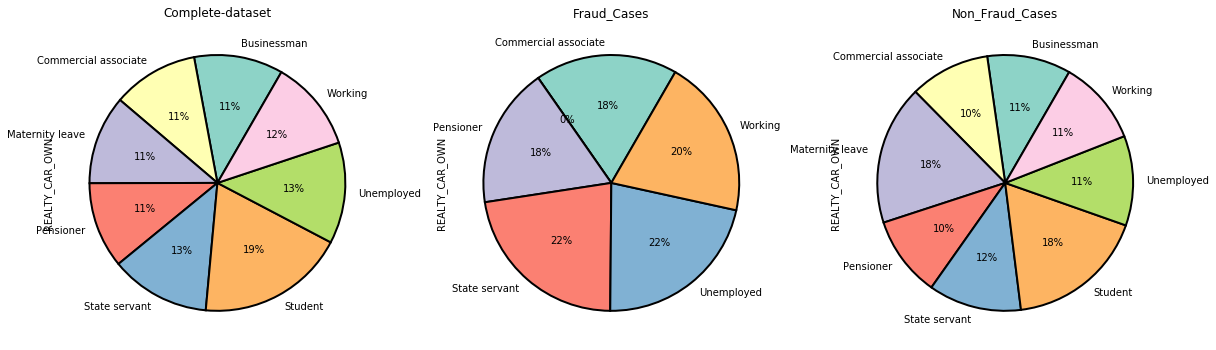

In [112]:
# Here we taken REALTY_CAR_OWN and NAME_INCOME_TYPE
# Categories like Unemployed and State Servent with No Car and No Property have more chance of getting defaulted.


plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-dataset")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.groupby("NAME_INCOME_TYPE")['REALTY_CAR_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.groupby("NAME_INCOME_TYPE")['REALTY_CAR_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud.groupby("NAME_INCOME_TYPE")['REALTY_CAR_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

#### Analysis of Numerical data

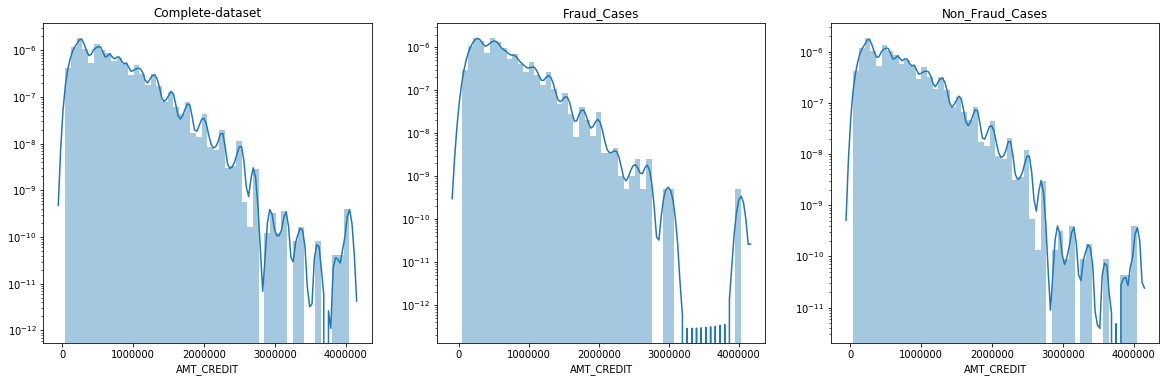

In [114]:
# Below 3 distribution plots are created so that we can compare the AMT_CREDIT in all the 
# 3 cases - Fraud, Non-Fraud and Complete dataset.
# Quite a less population of data in between 3M-4M for defauled cases.

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-dataset")
a=sns.distplot(app_data.AMT_CREDIT)
a.set_yscale('log')

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
b=sns.distplot(fraud_cases.AMT_CREDIT)
b.set_yscale('log')

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
c=sns.distplot(non_fraud.AMT_CREDIT)
c.set_yscale('log')

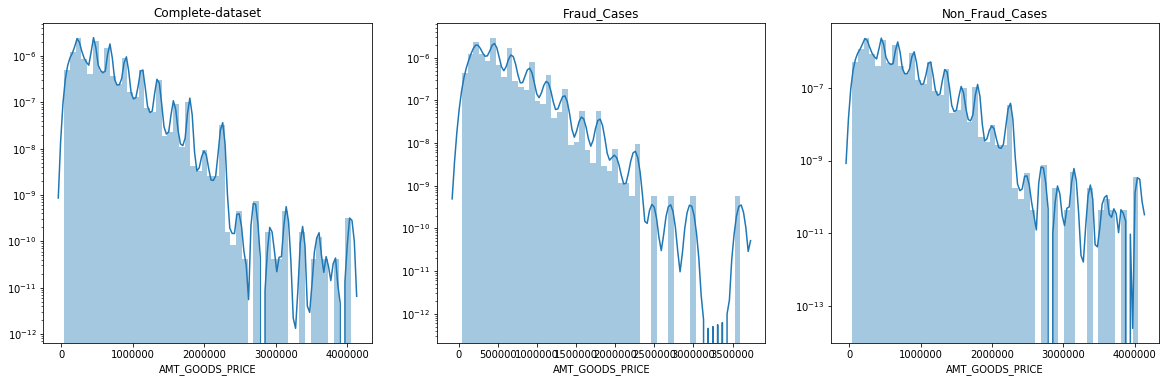

In [115]:
# Below 3 distribution plots are created so that we can compare the AMT_GOODS_PRICE in all the 
# 3 cases - Fraud, Non-Fraud and Complete dataset.
# Again same pattern, High money range having decline in all the cases.

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-dataset")
a=sns.distplot(app_data.AMT_GOODS_PRICE)
a.set_yscale('log')

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
b=sns.distplot(fraud_cases.AMT_GOODS_PRICE)
b.set_yscale('log')

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
c=sns.distplot(non_fraud.AMT_GOODS_PRICE)
c.set_yscale('log')

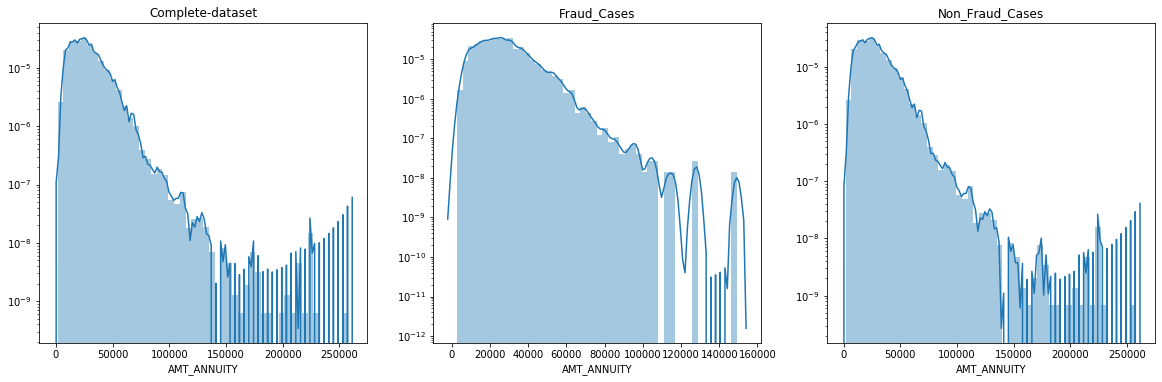

In [116]:
# Below 3 distribution plots are created so that we can compare the AMT_ANNUITY in all the 
# 3 cases - Fraud, Non-Fraud and Complete dataset.
# There are high volume of Loans with Lesser Annuity.

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-dataset")
a=sns.distplot(app_data.AMT_ANNUITY)
a.set_yscale('log')

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
b=sns.distplot(fraud_cases.AMT_ANNUITY)
b.set_yscale('log')

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
c=sns.distplot(non_fraud.AMT_ANNUITY.dropna())
c.set_yscale('log')


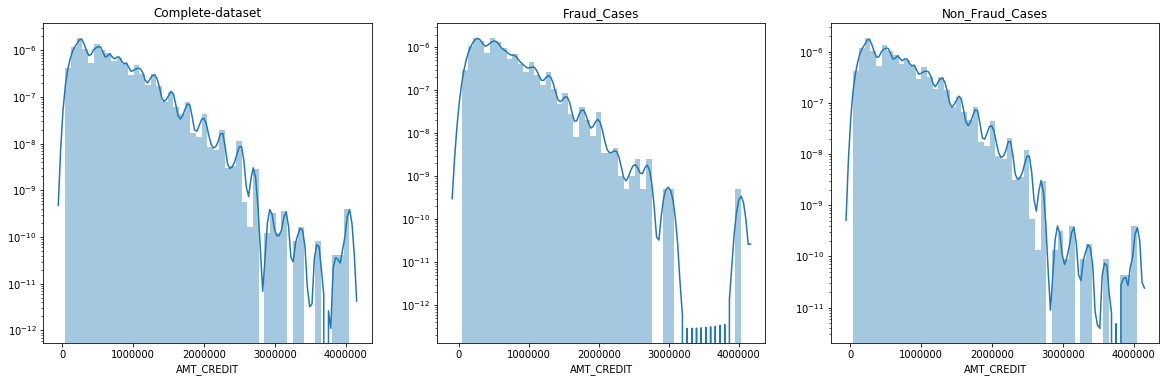

In [117]:
# Below 3 distribution plots are created so that we can compare the AMT_CREDIT in all the 
# 3 cases - Fraud, Non-Fraud and Complete dataset.
# Bank believes in giving more smaller loans than bigger loans.

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-dataset")
a=sns.distplot(app_data.AMT_CREDIT)
a.set_yscale('log')

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
b=sns.distplot(fraud_cases.AMT_CREDIT)
b.set_yscale('log')

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
c=sns.distplot(non_fraud.AMT_CREDIT)
c.set_yscale('log')

#### Building Corelation among Numerical Attributes

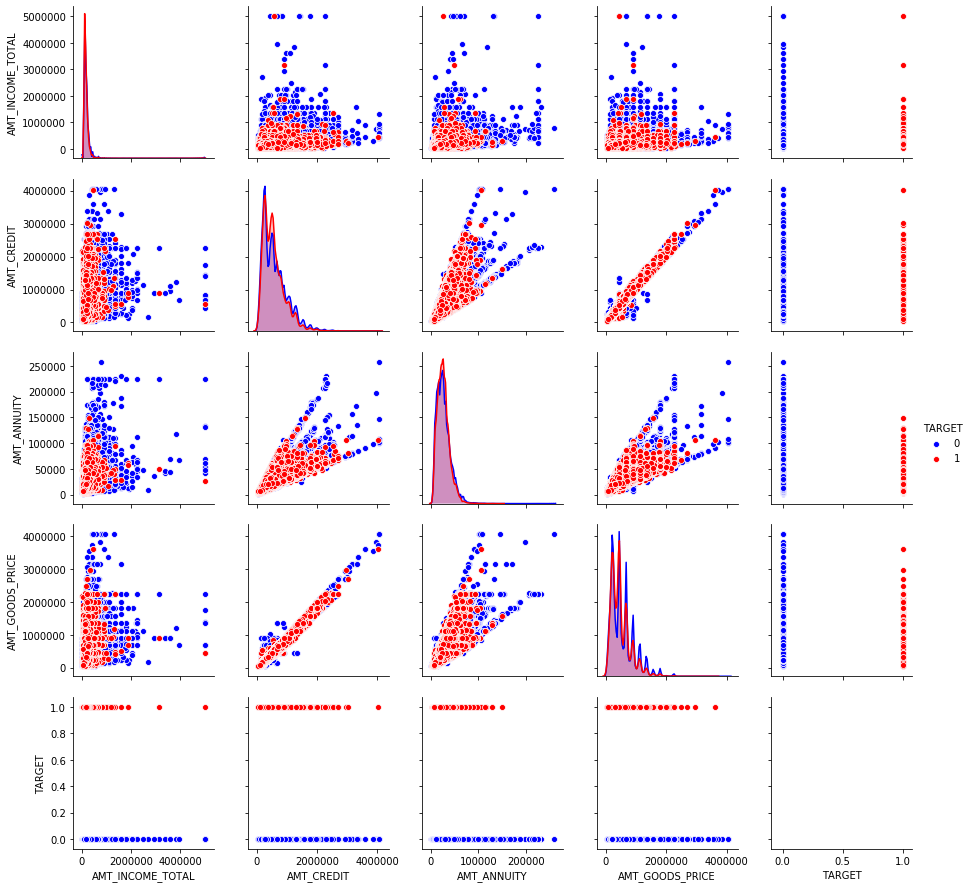

In [118]:
# Below we have created a pairplot to see all the amounts are corelated or not.
# There are some highly corelated, like AMT CREDIT and AMT_ANNUITY / AMT_CREDIT and AMT_GOODS_PRICE
# Comparatively lesser corelation between AMT_INCOME_TOTAL and AMT_CREDIT

amt_cor = app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]
sns.pairplot(amt_cor,hue='TARGET',palette=["b","r"])
plt.show()

In [119]:
# corr would hold all the attributes with non-object datatypes for complete dataset
corr= app_data.loc[:, app_data.dtypes!=np.object].corr()

In [120]:
# corr_fraud would hold all the attributes with non-object datatypes for fraud_cases dataset
corr_fraud= fraud_cases.loc[:, app_data.dtypes!=np.object].corr().corr()

In [121]:
# corr_non_fraud would hold all the attributes with non-object datatypes for non_fraud dataset
corr_non_fraud= non_fraud.loc[:, app_data.dtypes!=np.object].corr().corr()

(18.0, 0.0)

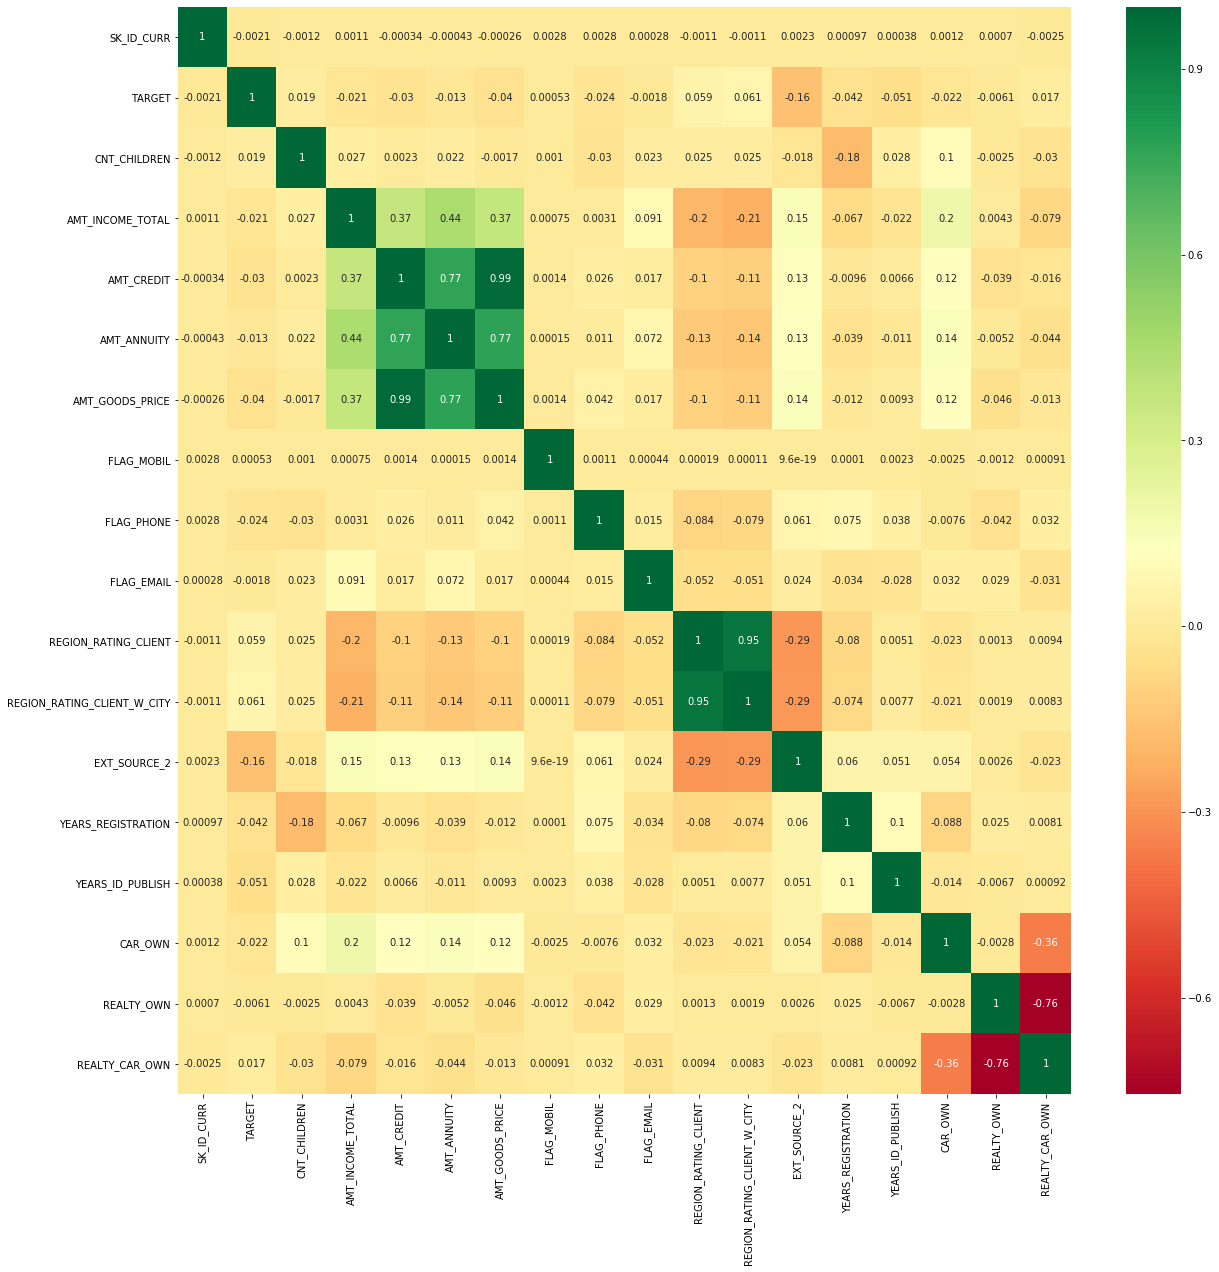

In [122]:
# Heatmap for all the Numerical attributes
plt.figure(figsize=(20,20))
ax=sns.heatmap(corr,annot=True,cmap='RdYlGn')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Top 10 Corelation

#### Please note that the detailed conclusion is provided in powerpoint presentation with limited discussion here.

In [123]:
# Finding the top 10 corelation for Numerical attributes on Complete Dataset
# Please note that there are negative corelation as well and we will compute those seperately. 

corrdf=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns =  ['VAR1','VAR2','CORELATION']
corrdf.dropna(subset=['CORELATION'],inplace=True)
corr_top10_Positive=corrdf.sort_values('CORELATION',ascending=False).head(10)
corr_top10_Negative=corrdf.sort_values('CORELATION',ascending=True).head(10)
corr_top10_Positive

,VAR1,VAR2,CORELATION
112,AMT_GOODS_PRICE,AMT_CREDIT,0.986734
208,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950842
113,AMT_GOODS_PRICE,AMT_ANNUITY,0.774837
94,AMT_ANNUITY,AMT_CREDIT,0.770127
93,AMT_ANNUITY,AMT_INCOME_TOTAL,0.444712
111,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.373332
75,AMT_CREDIT,AMT_INCOME_TOTAL,0.366534
273,CAR_OWN,AMT_INCOME_TOTAL,0.196463
219,EXT_SOURCE_2,AMT_INCOME_TOTAL,0.149231
275,CAR_OWN,AMT_ANNUITY,0.141587


In [124]:
# Top 10 Negative corelation
corr_top10_Negative

,VAR1,VAR2,CORELATION
322,REALTY_CAR_OWN,REALTY_OWN,-0.756000
321,REALTY_CAR_OWN,CAR_OWN,-0.360670
226,EXT_SOURCE_2,REGION_RATING_CLIENT,-0.292610
227,EXT_SOURCE_2,REGION_RATING_CLIENT_W_CITY,-0.288015
201,REGION_RATING_CLIENT_W_CITY,AMT_INCOME_TOTAL,-0.214342
183,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,-0.199496
236,YEARS_REGISTRATION,CNT_CHILDREN,-0.183738
217,EXT_SOURCE_2,TARGET,-0.160303
203,REGION_RATING_CLIENT_W_CITY,AMT_ANNUITY,-0.141674
185,REGION_RATING_CLIENT,AMT_ANNUITY,-0.128516


In [125]:
# Finding the top 10 corelation for Numerical attributes on non-fraud Dataset
# Please note that there are negative corelation as well and we will compute those seperately. 

corrdf=corr_non_fraud.where(np.triu(np.ones(corr_non_fraud.shape),k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns =  ['VAR1','VAR2','CORELATION']
corrdf.dropna(subset=['CORELATION'],inplace=True)
corr_non_fraud_top10_Positive=corrdf.sort_values('CORELATION',ascending=False).head(10)
corr_non_fraud_top10_Negative=corrdf.sort_values('CORELATION',ascending=True).head(10)
corr_non_fraud_top10_Positive

,VAR1,VAR2,CORELATION
112,AMT_GOODS_PRICE,AMT_CREDIT,0.999836
208,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.998636
113,AMT_GOODS_PRICE,AMT_ANNUITY,0.962924
94,AMT_ANNUITY,AMT_CREDIT,0.962089
93,AMT_ANNUITY,AMT_INCOME_TOTAL,0.743788
111,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.671384
75,AMT_CREDIT,AMT_INCOME_TOTAL,0.668035
273,CAR_OWN,AMT_INCOME_TOTAL,0.358589
219,EXT_SOURCE_2,AMT_INCOME_TOTAL,0.346906
221,EXT_SOURCE_2,AMT_ANNUITY,0.269971


In [126]:
# Top 10 Negative corelation 
corr_non_fraud_top10_Negative

,VAR1,VAR2,CORELATION
322,REALTY_CAR_OWN,REALTY_OWN,-0.917262
226,EXT_SOURCE_2,REGION_RATING_CLIENT,-0.649563
227,EXT_SOURCE_2,REGION_RATING_CLIENT_W_CITY,-0.646486
201,REGION_RATING_CLIENT_W_CITY,AMT_INCOME_TOTAL,-0.551487
183,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,-0.538605
321,REALTY_CAR_OWN,CAR_OWN,-0.519900
203,REGION_RATING_CLIENT_W_CITY,AMT_ANNUITY,-0.442840
185,REGION_RATING_CLIENT,AMT_ANNUITY,-0.429773
236,YEARS_REGISTRATION,CNT_CHILDREN,-0.418435
204,REGION_RATING_CLIENT_W_CITY,AMT_GOODS_PRICE,-0.397594


In [127]:
# Finding the top 10 corelation for Numerical attributes on fraud Dataset
# Please note that there are negative corelation as well and we will compute those seperately. 

corrdf=corr_fraud.where(np.triu(np.ones(corr_fraud.shape),k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns =  ['VAR1','VAR2','CORELATION']
corrdf.dropna(subset=['CORELATION'],inplace=True)
corr_fraud_top10_Positive=corrdf.sort_values('CORELATION',ascending=False).head(10)
corr_fraud_top10_Negative=corrdf.sort_values('CORELATION',ascending=True).head(10)
corr_fraud_top10_Positive

,VAR1,VAR2,CORELATION
112,AMT_GOODS_PRICE,AMT_CREDIT,0.999668
208,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.998870
94,AMT_ANNUITY,AMT_CREDIT,0.951537
113,AMT_GOODS_PRICE,AMT_ANNUITY,0.951266
93,AMT_ANNUITY,AMT_INCOME_TOTAL,0.633059
111,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.554492
75,AMT_CREDIT,AMT_INCOME_TOTAL,0.552737
273,CAR_OWN,AMT_INCOME_TOTAL,0.298289
219,EXT_SOURCE_2,AMT_INCOME_TOTAL,0.271220
303,REALTY_OWN,CAR_OWN,0.235011


In [128]:
# Top 10 Negative corelation on Fraud dataset
corr_fraud_top10_Negative

,VAR1,VAR2,CORELATION
322,REALTY_CAR_OWN,REALTY_OWN,-0.940097
226,EXT_SOURCE_2,REGION_RATING_CLIENT,-0.602807
227,EXT_SOURCE_2,REGION_RATING_CLIENT_W_CITY,-0.601845
321,REALTY_CAR_OWN,CAR_OWN,-0.525717
201,REGION_RATING_CLIENT_W_CITY,AMT_INCOME_TOTAL,-0.484287
183,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,-0.472210
236,YEARS_REGISTRATION,CNT_CHILDREN,-0.362265
203,REGION_RATING_CLIENT_W_CITY,AMT_ANNUITY,-0.358876
185,REGION_RATING_CLIENT,AMT_ANNUITY,-0.343047
204,REGION_RATING_CLIENT_W_CITY,AMT_GOODS_PRICE,-0.339167


# Analysis on prev_app dataset

In [129]:
# Lets delete everything which is greater than 20%
null_count = round(prev_app.isnull().sum() / len(prev_app),2)
missing_values = null_count[(null_count > 0.20)].index
prev_app.drop(missing_values, axis=1, inplace=True)

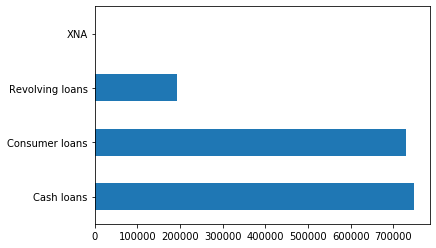

In [161]:
# Lets see what we have in NAME_CONTRACT_TYPE
prev_app.NAME_CONTRACT_TYPE.value_counts().plot(kind='barh')

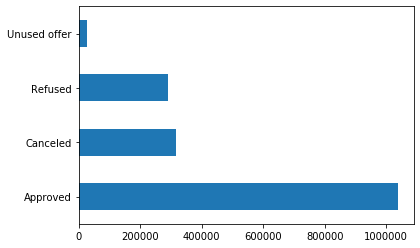

In [130]:
# Lets see what we have in NAME_CONTRACT_STATUS
prev_app.NAME_CONTRACT_STATUS.value_counts().plot(kind='barh')

# Merging Previous Dataset

In [131]:
# Merge app_data with prev_app.
# We have chose inner merge as we want to analyse only those customers who have applied in new application.

merge_data = pd.merge(left=app_data,right=prev_app, how='inner', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,YEARS_REGISTRATION,YEARS_ID_PUBLISH,age_by_decade,Emp_by_decade,CAR_OWN,REALTY_OWN,REALTY_CAR_OWN,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,1,0,2,2,Business Entity Type 3,0.262949,9.99,5.81,20s,Less Than 10,0,1,0,1038818,Consumer loans,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,1,1,0,1,1,School,0.622246,3.25,0.80,40s,Less Than 10,0,0,1,1810518,Cash loans,900000.0,1035882.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,1,1,0,1,1,School,0.622246,3.25,0.80,40s,Less Than 10,0,0,1,2636178,Consumer loans,337500.0,348637.5,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,1,1,0,1,1,School,0.622246,3.25,0.80,40s,Less Than 10,0,0,1,2396755,Consumer loans,68809.5,68053.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,1,0,2,2,Government,0.555912,11.67,6.93,50s,Less Than 10,1,1,0,1564014,Consumer loans,24282.0,20106.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,POS mobile without interest


In [164]:
merge_data.shape

(1413701, 51)

# Analysis on prev_app dataset

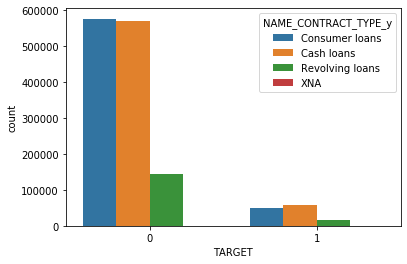

In [132]:
# Let's see how NAME_CONTRACT_TYPE_y (in prev dataset) is realted with Target
sns.countplot(x='TARGET', hue='NAME_CONTRACT_TYPE_y', data=merge_data)

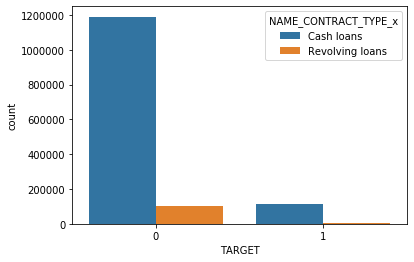

In [197]:
# Let's see how NAME_CONTRACT_TYPE_x (in app dataset) is realted with Target
sns.countplot(x='TARGET', hue='NAME_CONTRACT_TYPE_x', data=merge_data)

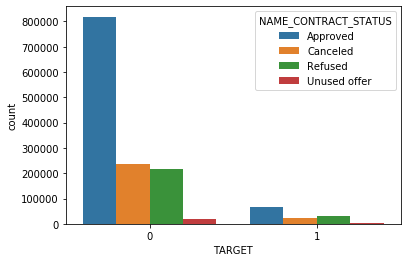

In [175]:
# Let's see how NAME_CONTRACT_STATUS is realted with Target
sns.countplot(x='TARGET', hue='NAME_CONTRACT_STATUS', data=merge_data)

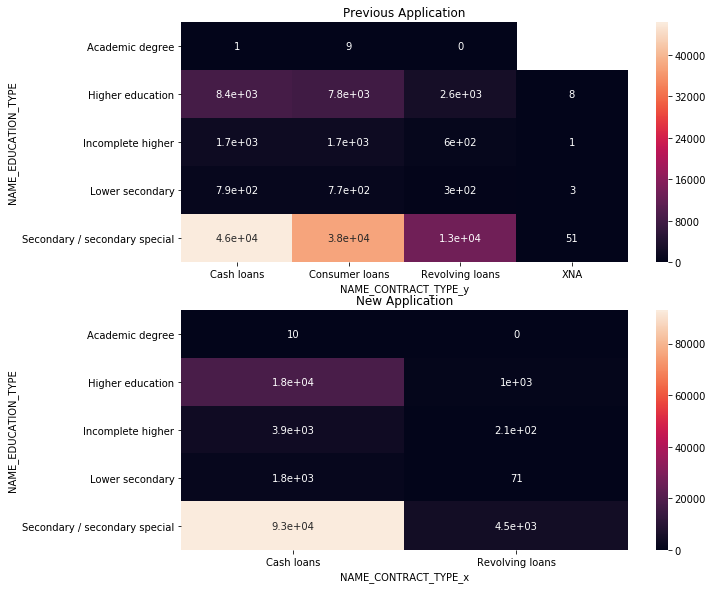

In [140]:
# Lets see the heatmap of NAME_EDUCATION_TYPE and NAME_CONTRACT_TYPE_y with Target as Values 
# AND NAME_EDUCATION_TYPE and NAME_CONTRACT_TYPE_x with TARGET as values.

# Please note we want to see NAME_CONTRACT_TYPE defers from Previous data to Application data.
# You can see kind of same corelation for both the heatmaps where Secondary education is highly corelated to Cash Loans


plt.figure(figsize=(10,15))
plt.subplot(3, 1, 1)
plt.title('Previous Application')
df2_heatmap = merge_data.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='NAME_CONTRACT_TYPE_y',aggfunc=np.sum)
ax=sns.heatmap(df2_heatmap,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


plt.subplot(3, 1, 2)
plt.title('New Application')
df2_heatmap = merge_data.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='NAME_CONTRACT_TYPE_x',aggfunc=np.sum)
ax=sns.heatmap(df2_heatmap,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

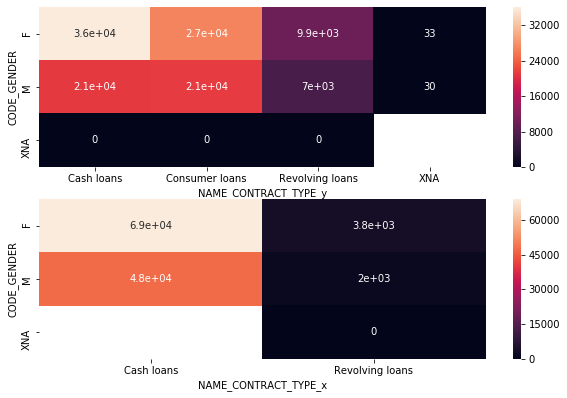

In [141]:
# Lets see the heatmap of CODE_GENDER and NAME_CONTRACT_TYPE_y with Target as Values 
# AND CODE_GENDER and NAME_CONTRACT_TYPE_x with TARGET as values.

# Please note we want to see NAME_CONTRACT_TYPE defers from Previous data to Application data.
# You can see kind of same corelation for both the heatmaps where Female is highly corelated to Cash Loans

plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
df_heatmap = merge_data.pivot_table(values='TARGET',index='CODE_GENDER',columns='NAME_CONTRACT_TYPE_y',aggfunc=np.sum)
ax=sns.heatmap(df_heatmap,annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(3, 1, 2)
df_heatmap = merge_data.pivot_table(values='TARGET',index='CODE_GENDER',columns='NAME_CONTRACT_TYPE_x',aggfunc=np.sum)
ax=sns.heatmap(df_heatmap,annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

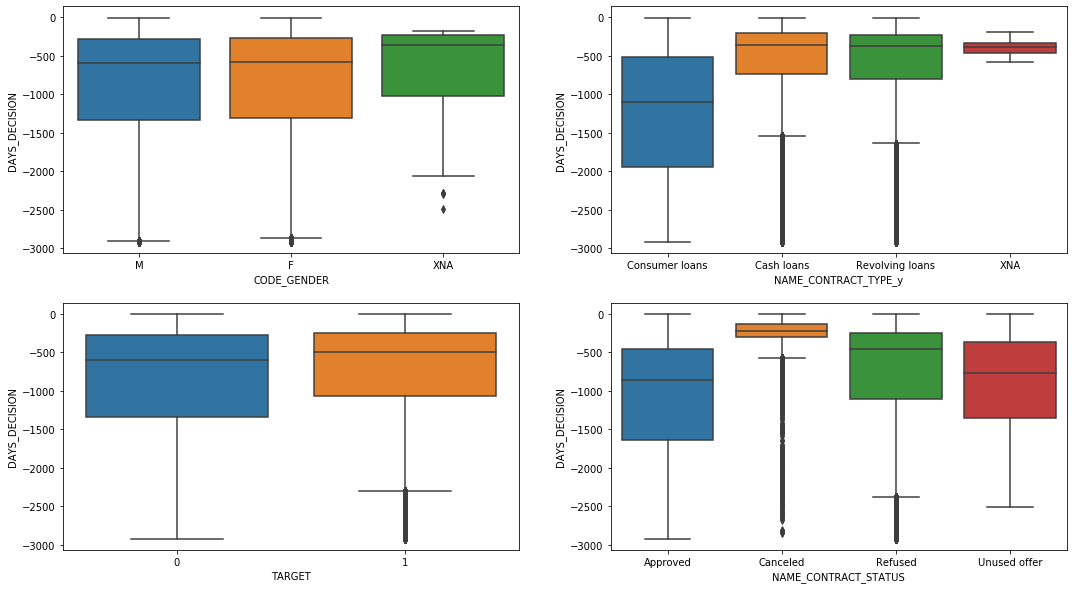

In [147]:
# Lets now see how DAYS_DECISION defers for various categorical attributes.
# You will finf Loan Calcellation is fastest. More insights are given in powerpoint presentation.

plt.figure(figsize=(18,10))
cat_var = ['CODE_GENDER', 'NAME_CONTRACT_TYPE_y', 'TARGET', 'NAME_CONTRACT_STATUS']
for i in enumerate(cat_var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x=i[1], y="DAYS_DECISION", data=merge_data)

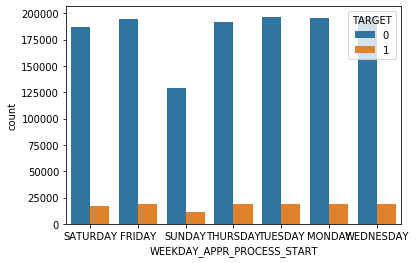

In [151]:
# Does days of Apprication Process start impact on Defaulting?
# Looks like nothing much to derive here.

sns.countplot(x='WEEKDAY_APPR_PROCESS_START', hue='TARGET', data=merge_data)

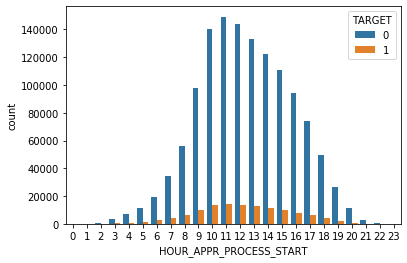

In [152]:
# Does days of Apprication Process start hour impact on Defaulting?
# Looks like nothing much to derive here.

sns.countplot(x='HOUR_APPR_PROCESS_START', hue='TARGET', data=merge_data)

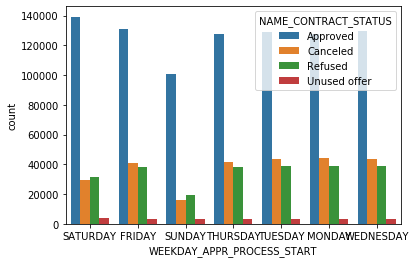

In [154]:
# Does days of Apprication Process start day impact on Staus of the Loans?
# Looks like Saturday is good day of getting aproval

sns.countplot(x='WEEKDAY_APPR_PROCESS_START', hue='NAME_CONTRACT_STATUS', data=merge_data)

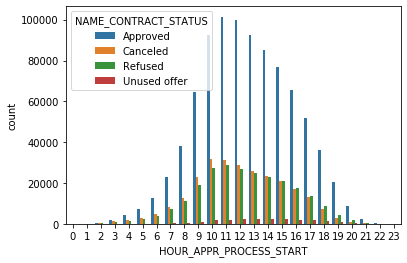

In [155]:
# Does days of Apprication Process start hour impact on Staus of the Loans?
# Looks like no significant relationship.

sns.countplot(x='HOUR_APPR_PROCESS_START', hue='NAME_CONTRACT_STATUS', data=merge_data)

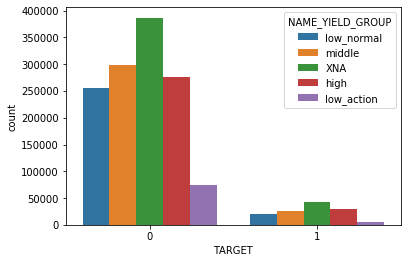

In [157]:
# Does Grouped interest rate impact on Staus of defaulting the Loans?
# Looks like no significant relationship.

sns.countplot(x='TARGET', hue='NAME_YIELD_GROUP', data=merge_data) 

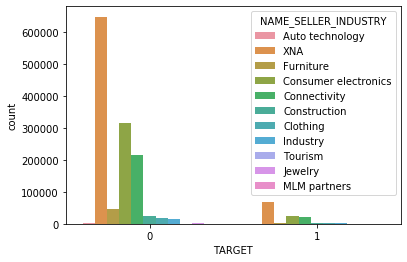

In [161]:
# Does Seller Industry impact on Staus of defaulting the Loans?
# Looks like no significant relationship.

sns.countplot(x='TARGET', hue='NAME_SELLER_INDUSTRY', data=merge_data) 

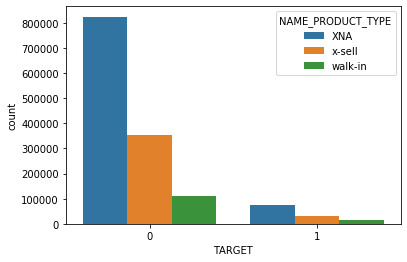

In [162]:
# Does Product Type on Staus of defaulting the Loans?
# Looks like no significant relationship.

sns.countplot(x='TARGET', hue='NAME_PRODUCT_TYPE', data=merge_data) 

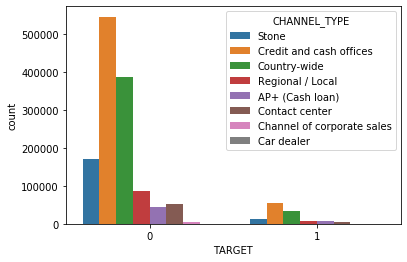

In [163]:
# Does Loan Channel of defaulting the Loans?
# Looks like no significant relationship.

sns.countplot(x='TARGET', hue='CHANNEL_TYPE', data=merge_data) 